# <center>ANN Binary Classification on Gender Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout
from imblearn.over_sampling import SMOTE

In [2]:
data =pd.read_csv('./gender_classification.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
data.shape

(5001, 8)

In [4]:
data.isnull().mean()*100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [5]:
data.isnull().mean()*100
data.drop_duplicates(inplace= True)

In [6]:
le =LabelEncoder()

In [7]:
data['gender'] =le.fit_transform(data.gender)

In [8]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
sc= StandardScaler()

In [11]:
x = sc.fit_transform(x)

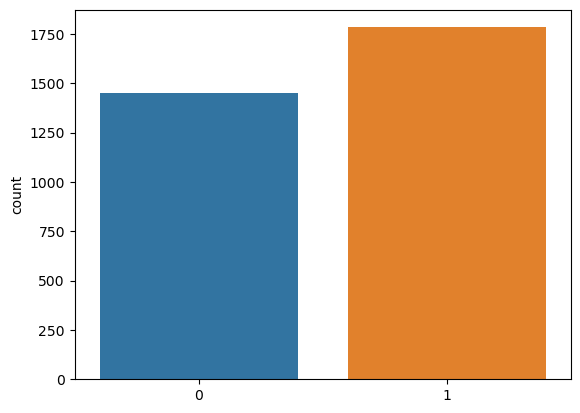

In [12]:
sns.countplot(x=y);


In [13]:
oversample =SMOTE()
x,y =oversample.fit_resample(x,y)

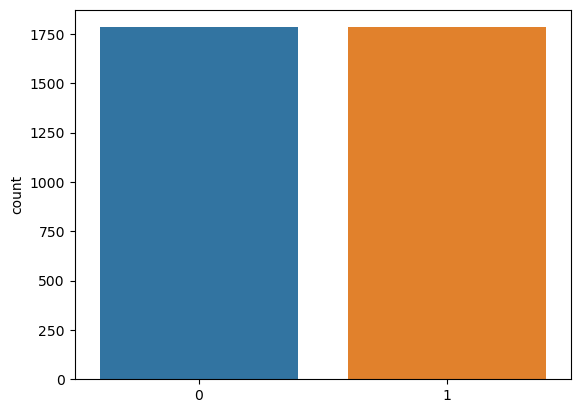

In [14]:
sns.countplot(x=y);

In [15]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
tf.random.set_seed(42)

In [17]:
model =Sequential()

### Adding Neuron 

In [18]:
model.add(Dense(128,activation='relu',input_dim =x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17665 (69.00 KB)
Trainable params: 17665 (69.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling The Model

In [19]:
model.compile(optimizer ='sgd',loss='binary_crossentropy',metrics=['accuracy'])

### Early Stopping Callback

In [20]:
early_stopping = EarlyStopping(monitor='val_loss',patience=50,mode='min',restore_best_weights=True,
                              verbose =1)

### Model Training

In [21]:
history =model.fit(x_train,y_train,batch_size=32,callbacks=[early_stopping],epochs=5000,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/5000
90/90 [==============================] - 1s 3ms/step - loss: 0.6076 - accuracy: 0.7051 - val_loss: 0.5086 - val_accuracy: 0.9202
Epoch 2/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.9190 - val_loss: 0.3608 - val_accuracy: 0.9524
Epoch 3/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.9460 - val_loss: 0.2567 - val_accuracy: 0.9552
Epoch 4/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9485 - val_loss: 0.1961 - val_accuracy: 0.9566
Epoch 5/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9499 - val_loss: 0.1611 - val_accuracy: 0.9552
Epoch 6/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9488 - val_loss: 0.1408 - val_accuracy: 0.9566
Epoch 7/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1514 - accuracy: 0.9502 - val_loss: 0.1284 - val_accuracy: 0.9538
Epoch 

90/90 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9548 - val_loss: 0.0987 - val_accuracy: 0.9622
Epoch 59/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9551 - val_loss: 0.0986 - val_accuracy: 0.9608
Epoch 60/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9565 - val_loss: 0.0987 - val_accuracy: 0.9608
Epoch 61/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9572 - val_loss: 0.0987 - val_accuracy: 0.9594
Epoch 62/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1085 - accuracy: 0.9579 - val_loss: 0.0987 - val_accuracy: 0.9622
Epoch 63/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9572 - val_loss: 0.0984 - val_accuracy: 0.9636
Epoch 64/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9593 - val_loss: 0.0985 - val_accuracy: 0.9608
Epoch 65/5000

90/90 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9600 - val_loss: 0.0980 - val_accuracy: 0.9622
Epoch 116/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9590 - val_loss: 0.0981 - val_accuracy: 0.9594
Epoch 117/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9593 - val_loss: 0.0982 - val_accuracy: 0.9608
Epoch 118/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9614 - val_loss: 0.0981 - val_accuracy: 0.9594
Epoch 119/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9604 - val_loss: 0.0983 - val_accuracy: 0.9594
Epoch 120/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9579 - val_loss: 0.0981 - val_accuracy: 0.9594
Epoch 121/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9604 - val_loss: 0.0982 - val_accuracy: 0.9580
Epoch 1

Epoch 172/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9611 - val_loss: 0.0969 - val_accuracy: 0.9594
Epoch 173/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9649 - val_loss: 0.0969 - val_accuracy: 0.9594
Epoch 174/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9621 - val_loss: 0.0970 - val_accuracy: 0.9594
Epoch 175/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9632 - val_loss: 0.0971 - val_accuracy: 0.9594
Epoch 176/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9576 - val_loss: 0.0974 - val_accuracy: 0.9594
Epoch 177/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9639 - val_loss: 0.0975 - val_accuracy: 0.9594
Epoch 178/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9593 - val_loss: 0.0973 - val_accuracy:

Epoch 229/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9625 - val_loss: 0.0966 - val_accuracy: 0.9622
Epoch 230/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9625 - val_loss: 0.0968 - val_accuracy: 0.9622
Epoch 231/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9625 - val_loss: 0.0967 - val_accuracy: 0.9622
Epoch 232/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9632 - val_loss: 0.0969 - val_accuracy: 0.9622
Epoch 233/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9618 - val_loss: 0.0970 - val_accuracy: 0.9622
Epoch 234/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9649 - val_loss: 0.0971 - val_accuracy: 0.9622
Epoch 235/5000
90/90 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9628 - val_loss: 0.0973 - val_accuracy:

### Evaluating the Model

In [22]:
history_dict =history.history

#### 1.Learning Curve

In [23]:
acc = history_dict['accuracy']
val_acc =history_dict['val_accuracy']

#### 2.Loss

In [24]:
loss = history_dict['loss']
val_loss =history_dict['val_loss']

#### 3.Range of x or number of epochs in the graphm

In [25]:
epochs = range(1,len(acc)+1)

#### 4.Plot

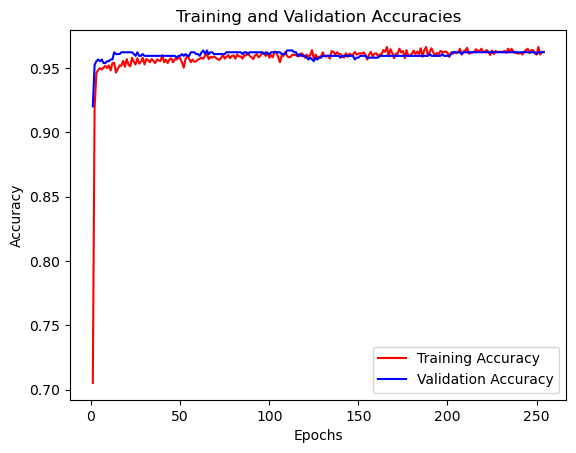

In [26]:
plt.plot(epochs,acc,'r',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label ='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
y_pred =model.predict(x_test)

23/23 [==============================] - 0s 982us/step


In [28]:
y_pred =(y_pred>0.5)

In [29]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [30]:
matrix = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

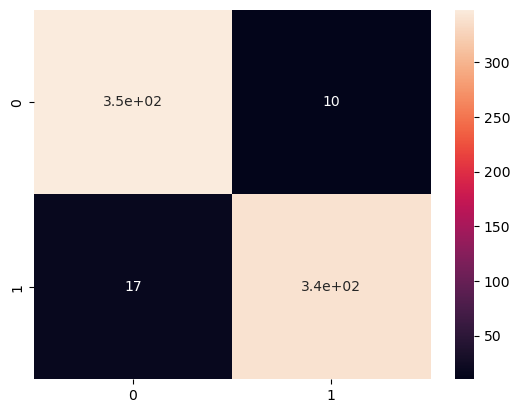

In [31]:
sns.heatmap(matrix,annot=True)

<h3> Classification Report
<h6><li>A classification report is a tool used in machine learning to evaluate the performance of a classification model. It provides a summary of various metrics that describe the model's performance, such as precision, recall, and F1-score

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       358
           1       0.97      0.95      0.96       356

    accuracy                           0.96       714
   macro avg       0.96      0.96      0.96       714
weighted avg       0.96      0.96      0.96       714

